# Analysis and prediction of carbon emissions in U.S.
### Team members: Zihan Wan, Rongjin Huang, Qian Chen

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score

## Background

According to many resarches such as,
- **"Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement"** <br/>Source:*[Nature](https://www.nature.com/articles/s41558-020-0797-x)*
- **"Impact of domestic travel restrictions on transmission of COVID-19"** <br/>Source:*[Nature](https://www.nature.com/articles/s41598-021-81806-3)*
- **"Covid-19 impact on electricity"** <br/>Source:*[IEA](https://www.iea.org/reports/covid-19-impact-on-electricity)*

Lockdown policy in various country, whcih is the primary approach to control Covid-19, has signally impacted every aspect of daily life, especially for electrity usage and transporation volume.Obviously,those changes will result in the change of GHG(Green House Gas) Emission since energy consumption accounts for over 90% of daily GHG Emission.

Inspired by this phenomenon, in this project we will predict the carbon emission based on the monthly energy consumption(from 1973.01 to 2021.08) in U.S.

We will predict from 2 aspects:
- ***Energy Consumption by different sectors***
- ***Energy Consumption by different energy types***

*[data source:U.S. Energy Information Administration](https://www.eia.gov/totalenergy/data/monthly/)*

### Energy Consumption by different sectors
> *Residential,Commercial,Industrial,Transportation are the four most pronounced sectors which consuming energy.*

In [2]:
import pandas as pd
consumption_sector = pd.read_csv("../../data/Energy consumption by sector.csv")
# consumption_sector.info()
consumption_sector.head()

,Year,Month,Residential Sector,Commercial Sector,Industrial Sector,Transportation Sector,Energy Consumption Total
0,1973.0,January,1957.641,1080.680,2673.882,1507.977,7223.873
1,1973.0,February,1712.143,1003.913,2432.592,1441.064,6592.366
2,1973.0,March,1510.079,886.420,2561.729,1564.146,6521.439
3,1973.0,April,1183.421,736.851,2540.020,1483.064,5941.729
4,1973.0,May,1006.326,695.636,2747.831,1624.965,6071.940


In [3]:
consumption_sector_year=consumption_sector.groupby('Year').agg('sum')

Text(0.5, 1.0, 'Total Consumption by End-User Sector,1973-2020')

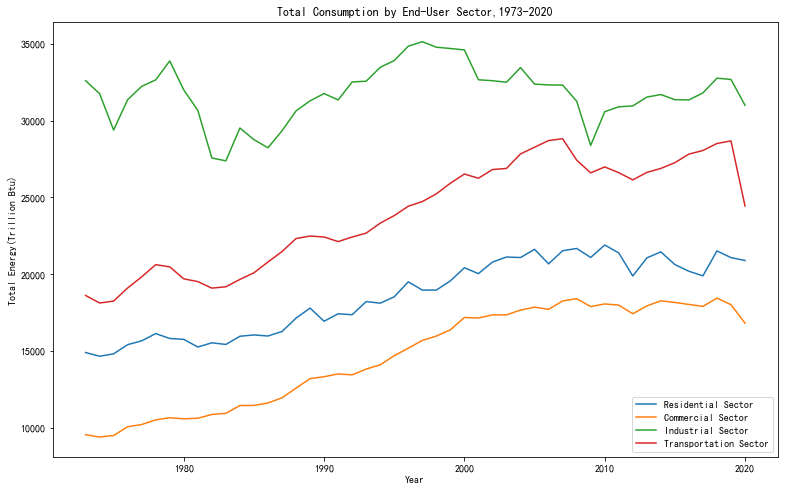

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
data1 = consumption_sector_year[['Residential Sector','Commercial Sector','Industrial Sector','Transportation Sector']]
data1.plot.line(figsize=(13,8))
plt.xlabel('Year') 
plt.ylabel('Total Energy(Trillion Btu)') 
plt.title('Total Consumption by End-User Sector,1973-2020')

### Energy Consumption by Energy Sources

In [5]:
file_sector_all = pd.read_excel('../../data/consumption by energy type.xlsx',sheet_name='Sheet1')
file_sector_all.head(10)

,Month,Petroleum Products Supplied,Natural Gas Consumption,Coal Consumption,"Electricity End Use, Total",Total Renewable Energy Consumption
0,1973-01-01,18712.645,2348.0,50578.608,144.505,403.981
1,1973-02-01,19094.143,2126.0,45564.808,139.546,360.900
2,1973-03-01,17216.226,2015.0,45402.955,137.102,400.161
3,1973-04-01,15920.533,1835.0,43326.498,131.366,380.470
4,1973-05-01,16625.806,1729.0,43999.759,131.361,392.141
5,1973-06-01,16481.333,1534.0,45542.675,140.293,377.232
6,1973-07-01,16372.387,1558.0,48160.561,152.562,367.325
7,1973-08-01,17498.839,1582.0,49255.285,157.481,353.757
8,1973-09-01,16656.300,1527.0,45874.659,157.310,307.006
9,1973-10-01,17202.226,1708.0,46978.211,146.042,323.453


In [6]:
file_sector_selected = file_sector_all.drop(columns=['Electricity End Use, Total','Total Renewable Energy Consumption'])
#file_sector_selected = file_sector_selected.drop([2],axis=0)
file_sector_selected.head(5)

,Month,Petroleum Products Supplied,Natural Gas Consumption,Coal Consumption
0,1973-01-01,18712.645,2348.0,50578.608
1,1973-02-01,19094.143,2126.0,45564.808
2,1973-03-01,17216.226,2015.0,45402.955
3,1973-04-01,15920.533,1835.0,43326.498
4,1973-05-01,16625.806,1729.0,43999.759


In [7]:
file_CO2_all = pd.read_csv("../../data/Carbon Dioxide Emissions From Energy Consumption by Source.csv")
file_CO2_all.head(5)

,Month,"Coal, Including Coal Coke Net Imports, CO2 Emissions","Natural Gas, Excluding Supplemental Gaseous Fuels, CO2 Emissions",Aviation Gasoline CO2 Emissions,"Distillate Fuel Oil, Excluding Biodiesel, CO2 Emissions",Hydrocarbon Gas Liquids CO2 Emissions,Jet Fuel CO2 Emissions,Kerosene CO2 Emissions,Lubricants CO2 Emissions,"Motor Gasoline, Excluding Ethanol, CO2 Emissions",Petroleum Coke CO2 Emissions,Residual Fuel Oil CO2 Emissions,Other Petroleum Products CO2 Emissions,"Petroleum, Excluding Biofuels, CO2 Emissions",Total Energy CO2 Emissions
0,1973 January,109.552,125.557,0.428,55.157,10.460,13.742,5.223,1.037,70.948,4.850,48.370,8.753,218.968,454.078
1,1973 February,98.833,113.750,0.431,51.771,8.846,12.193,4.476,1.025,67.422,3.992,44.686,7.673,202.515,415.098
2,1973 March,98.483,107.700,0.459,44.460,6.684,12.293,2.582,1.105,75.532,4.357,45.111,8.658,201.240,407.423
3,1973 April,94.150,97.838,0.446,33.973,5.790,12.112,2.031,0.979,73.415,4.179,35.063,8.229,176.218,368.205
4,1973 May,95.424,92.039,0.549,35.591,5.486,13.756,1.703,1.156,80.105,4.644,36.889,8.687,188.565,376.028


In [8]:
file_CO2 = file_CO2_all[['Total Energy CO2 Emissions']]
file_CO2.head(5)

,Total Energy CO2 Emissions
0,454.078
1,415.098
2,407.423
3,368.205
4,376.028


In [9]:
data_all = pd.concat([file_sector_selected,file_CO2], axis=1)
data_all = data_all.set_index(list(data_all)[0])
data_all.tail(10)

,Petroleum Products Supplied,Natural Gas Consumption,Coal Consumption,Total Energy CO2 Emissions
Month,,,,
2020-11-01,18742.522,2434.877,38027.715,372.212
2020-12-01,18801.691,3167.833,47289.637,435.459
2021-01-01,18595.400,3286.205,49312.464,444.296
2021-02-01,17444.199,3042.817,51681.901,415.995
2021-03-01,19203.830,2607.567,38364.426,398.793
2021-04-01,19459.363,2237.784,33677.939,364.564
2021-05-01,20093.642,2094.470,39255.918,375.589
2021-06-01,20537.159,2214.401,51645.852,402.258
2021-07-01,19894.010,2382.662,60091.363,427.428


---

## Integrating Data

In [10]:
# this the original data
file_energy_all = pd.read_excel('../../data/consumption by energy type.xlsx',sheet_name='Sheet1')
file_energy_all.head(10)

,Month,Petroleum Products Supplied,Natural Gas Consumption,Coal Consumption,"Electricity End Use, Total",Total Renewable Energy Consumption
0,1973-01-01,18712.645,2348.0,50578.608,144.505,403.981
1,1973-02-01,19094.143,2126.0,45564.808,139.546,360.900
2,1973-03-01,17216.226,2015.0,45402.955,137.102,400.161
3,1973-04-01,15920.533,1835.0,43326.498,131.366,380.470
4,1973-05-01,16625.806,1729.0,43999.759,131.361,392.141
5,1973-06-01,16481.333,1534.0,45542.675,140.293,377.232
6,1973-07-01,16372.387,1558.0,48160.561,152.562,367.325
7,1973-08-01,17498.839,1582.0,49255.285,157.481,353.757
8,1973-09-01,16656.300,1527.0,45874.659,157.310,307.006
9,1973-10-01,17202.226,1708.0,46978.211,146.042,323.453


In [11]:
#choose the selected sector
file_energy_selected = file_energy_all.drop(columns=['Month','Electricity End Use, Total','Total Renewable Energy Consumption'])
file_energy_selected.head(5)

,Petroleum Products Supplied,Natural Gas Consumption,Coal Consumption
0,18712.645,2348.0,50578.608
1,19094.143,2126.0,45564.808
2,17216.226,2015.0,45402.955
3,15920.533,1835.0,43326.498
4,16625.806,1729.0,43999.759


In [12]:
#input the original CO2 emissions data
file_CO2_all = pd.read_csv("../../data/Carbon Dioxide Emissions From Energy Consumption by Source.csv")
file_CO2_all.head(5)

,Month,"Coal, Including Coal Coke Net Imports, CO2 Emissions","Natural Gas, Excluding Supplemental Gaseous Fuels, CO2 Emissions",Aviation Gasoline CO2 Emissions,"Distillate Fuel Oil, Excluding Biodiesel, CO2 Emissions",Hydrocarbon Gas Liquids CO2 Emissions,Jet Fuel CO2 Emissions,Kerosene CO2 Emissions,Lubricants CO2 Emissions,"Motor Gasoline, Excluding Ethanol, CO2 Emissions",Petroleum Coke CO2 Emissions,Residual Fuel Oil CO2 Emissions,Other Petroleum Products CO2 Emissions,"Petroleum, Excluding Biofuels, CO2 Emissions",Total Energy CO2 Emissions
0,1973 January,109.552,125.557,0.428,55.157,10.460,13.742,5.223,1.037,70.948,4.850,48.370,8.753,218.968,454.078
1,1973 February,98.833,113.750,0.431,51.771,8.846,12.193,4.476,1.025,67.422,3.992,44.686,7.673,202.515,415.098
2,1973 March,98.483,107.700,0.459,44.460,6.684,12.293,2.582,1.105,75.532,4.357,45.111,8.658,201.240,407.423
3,1973 April,94.150,97.838,0.446,33.973,5.790,12.112,2.031,0.979,73.415,4.179,35.063,8.229,176.218,368.205
4,1973 May,95.424,92.039,0.549,35.591,5.486,13.756,1.703,1.156,80.105,4.644,36.889,8.687,188.565,376.028


In [13]:
#choose data we need 
file_CO2 = file_CO2_all[['Month','Total Energy CO2 Emissions']]
file_CO2.head(5)

,Month,Total Energy CO2 Emissions
0,1973 January,454.078
1,1973 February,415.098
2,1973 March,407.423
3,1973 April,368.205
4,1973 May,376.028


In [14]:
# Merge two sets of data
data_all = pd.concat([file_CO2, file_energy_selected], axis=1)
data_all = data_all.set_index(list(data_all)[0])
data_all.tail(10)

,Total Energy CO2 Emissions,Petroleum Products Supplied,Natural Gas Consumption,Coal Consumption
Month,,,,
2020 November,372.212,18742.522,2434.877,38027.715
2020 December,435.459,18801.691,3167.833,47289.637
2021 January,444.296,18595.400,3286.205,49312.464
2021 February,415.995,17444.199,3042.817,51681.901
2021 March,398.793,19203.830,2607.567,38364.426
2021 April,364.564,19459.363,2237.784,33677.939
2021 May,375.589,20093.642,2094.470,39255.918
2021 June,402.258,20537.159,2214.401,51645.852
2021 July,427.428,19894.010,2382.662,60091.363


* We plan to predict the data after 2020 so we need to adapt the training dataset to before 2020. 

In [15]:
data = data_all.drop(data_all.tail(20).index)
data.tail(5)

,Total Energy CO2 Emissions,Petroleum Products Supplied,Natural Gas Consumption,Coal Consumption
Month,,,,
2019 August,443.533,21157.914,2433.924,56310.744
2019 September,403.397,20248.481,2206.252,51113.288
2019 October,404.192,20713.986,2306.544,41517.648
2019 November,432.482,20736.154,2783.754,45869.143
2019 December,455.048,20442.870,3170.717,44574.785


In [16]:
order = ['Petroleum Products Supplied','Natural Gas Consumption', 'Coal Consumption','Total Energy CO2 Emissions']
data = data[order]
data.to_csv('../../data/data.csv', index = True)
#Export the data for storage for later reading.

In [17]:
#The post-2020 data are stored separately as the dependent variable of the forecast.
data_x_real = data_all.tail(20)
data_x_real = data_x_real.drop(columns=['Total Energy CO2 Emissions'])
data_x_real.to_csv('../../data/data_x_real.csv', index = True)
data_x_real.head(5)

,Petroleum Products Supplied,Natural Gas Consumption,Coal Consumption
Month,,,
2020 January,19933.390,3299.777,40722.454
2020 February,20132.252,3041.481,35982.735
2020 March,18462.842,2707.481,32800.556
2020 April,14548.505,2240.544,26717.411
2020 May,16078.185,2067.048,29834.420


In [18]:
#The carbon emission data after 20 months are stored as a control group.
data_y_real = file_CO2_all[['Month','Total Energy CO2 Emissions']].tail(20)
data_y_real = data_y_real.set_index(list(data_y_real)[0])
data_y_real.to_csv('../../data_y_real.csv', index = True)
data_y_real.head(5)

,Total Energy CO2 Emissions
Month,
2020 January,448.679
2020 February,416.939
2020 March,386.462
2020 April,304.048
2020 May,317.044


* Here is the second set of data

In [19]:
#the original data
file_sector_all = pd.read_excel('../../data/Energy Consumption by Sector .xlsx',sheet_name='Monthly Data', skiprows = 10)
file_sector_all.head()

,Month,Primary Energy Consumed by the Residential Sector,Total Energy Consumed by the Residential Sector,Primary Energy Consumed by the Commercial Sector,Total Energy Consumed by the Commercial Sector,Primary Energy Consumed by the Industrial Sector,Total Energy Consumed by the Industrial Sector,Primary Energy Consumed by the Transportation Sector,Total Energy Consumed by the Transportation Sector,Primary Energy Consumed by the Electric Power Sector,Energy Consumption Balancing Item,Primary Energy Consumption Total
0,1973-01-01,1339.270,1957.641,657.977,1080.680,2027.033,2673.882,1504.805,1507.977,1691.096,3.693,7223.873
1,1973-02-01,1174.899,1712.143,623.759,1003.913,1841.299,2432.592,1438.298,1441.064,1511.458,2.654,6592.366
2,1973-03-01,983.374,1510.079,492.136,886.420,1926.411,2561.729,1561.293,1564.146,1559.159,-0.934,6521.439
3,1973-04-01,715.391,1183.421,363.393,736.851,1914.017,2540.020,1480.403,1483.064,1470.152,-1.627,5941.729
4,1973-05-01,535.914,1006.326,288.630,695.636,2076.468,2747.831,1622.115,1624.965,1551.631,-2.817,6071.940


In [20]:
# choose we need ,reorder and rename them
file_sector_selected = file_sector_all[['Primary Energy Consumed by the Residential Sector',
                                       'Primary Energy Consumed by the Industrial Sector',
                                        'Primary Energy Consumed by the Transportation Sector',
                                       'Primary Energy Consumed by the Electric Power Sector']]
file_sector_selected.columns = ['Residential','Industrial', 'Transportation','Electric']
file_sector_selected.head()

,Residential,Industrial,Transportation,Electric
0,1339.270,2027.033,1504.805,1691.096
1,1174.899,1841.299,1438.298,1511.458
2,983.374,1926.411,1561.293,1559.159
3,715.391,1914.017,1480.403,1470.152
4,535.914,2076.468,1622.115,1551.631


In [21]:
data_all_2 = pd.concat([file_CO2, file_sector_selected], axis=1)
data_all_2 = data_all_2.set_index(list(data_all_2)[0])
data_all_2 = data_all_2[['Residential', 'Industrial', 'Transportation', 'Electric', 'Total Energy CO2 Emissions']]
data_all_2.tail(10)

,Residential,Industrial,Transportation,Electric,Total Energy CO2 Emissions
Month,,,,,
2020 November,607.800,1903.230,1996.732,2702.371,372.212
2020 December,1020.722,2002.421,2057.195,3074.376,435.459
2021 January,1101.878,2004.377,2022.214,3133.468,444.296
2021 February,1089.205,1586.723,1844.765,2946.903,415.995
2021 March,756.864,1903.637,2192.060,2783.234,398.793
2021 April,491.828,1868.215,2158.498,2592.263,364.564
2021 May,352.606,1921.686,2306.381,2846.091,375.589
2021 June,243.640,1894.543,2304.651,3348.966,402.258
2021 July,222.862,1872.275,2386.907,3631.158,427.428


In [22]:
data_2 = data_all_2.drop(data_all_2.tail(20).index)
data_2.tail(5)
data_2.to_csv('../../data/data_2.csv', index = True)

In [23]:
data_x_real_2 = data_all_2.tail(20)
data_x_real_2 = data_x_real_2.drop(columns=['Total Energy CO2 Emissions'])
data_x_real_2.head(5)
data_x_real_2.to_csv('../../data/data_x_real_2.csv', index = True)

At this point, we have the required dataset in two aspects:
- ***Energy Consumption by different sectors***
- ***Energy Consumption by different energy types***

_______________________________________________________________________

## Exploratory Data Analysis(EDA)

### Ascept-1 : Energy Consumption by different energy types

In [24]:
data.head()

,Petroleum Products Supplied,Natural Gas Consumption,Coal Consumption,Total Energy CO2 Emissions
Month,,,,
1973 January,18712.645,2348.0,50578.608,454.078
1973 February,19094.143,2126.0,45564.808,415.098
1973 March,17216.226,2015.0,45402.955,407.423
1973 April,15920.533,1835.0,43326.498,368.205
1973 May,16625.806,1729.0,43999.759,376.028


In [25]:
# Understand the basic ground information of data
def all_about_my_data(data):
    
    # Shape of the dataframe
    print("Number of Instances:",data.shape[0])
    print("Number of Features:",data.shape[1])
    
    # Summary Stats
    print("\nSummary Stats:")
    print(data.describe())
    
    # Feature Names
    print("\nFeature Names:")
    print(data.columns)
        
    # Missing Values
    print("\nMissing Values:")
    print(data.isna().sum())

all_about_my_data(data)

Number of Instances: 564
Number of Features: 4

Summary Stats:
       Petroleum Products Supplied  Natural Gas Consumption  Coal Consumption  \
count                   564.000000               564.000000        564.000000   
mean                  18300.896209              1828.923977      72708.385904   
std                    1685.487745               457.438129      15985.097215   
min                   14504.705000               939.930000      37282.224000   
25%                   16932.971000              1507.248000      59683.146000   
50%                   18550.868000              1747.988500      73793.679000   
75%                   19690.328500              2142.838000      85419.847000   
max                   21666.060000              3424.302000     105786.699000   

       Total Energy CO2 Emissions  
count                   564.00000  
mean                    434.17455  
std                      49.54187  
min                     332.92400  
25%                     395

<AxesSubplot:>

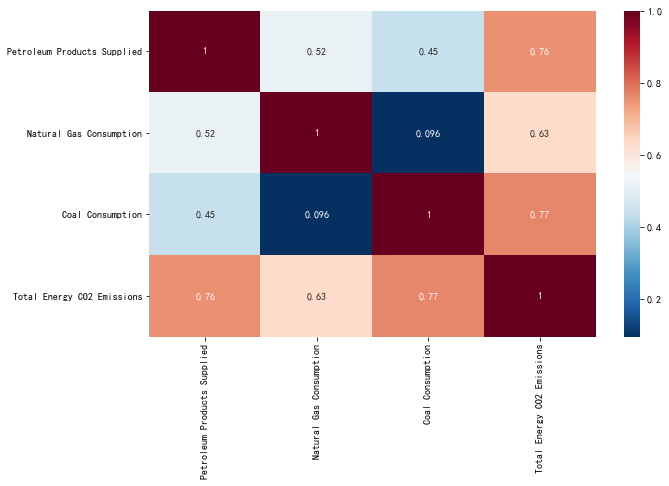

In [26]:
#Calculate correlation coefficients and plot a heat map
cor = data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor, xticklabels = cor.columns, yticklabels = cor.columns,cmap = 'RdBu_r',annot=True)

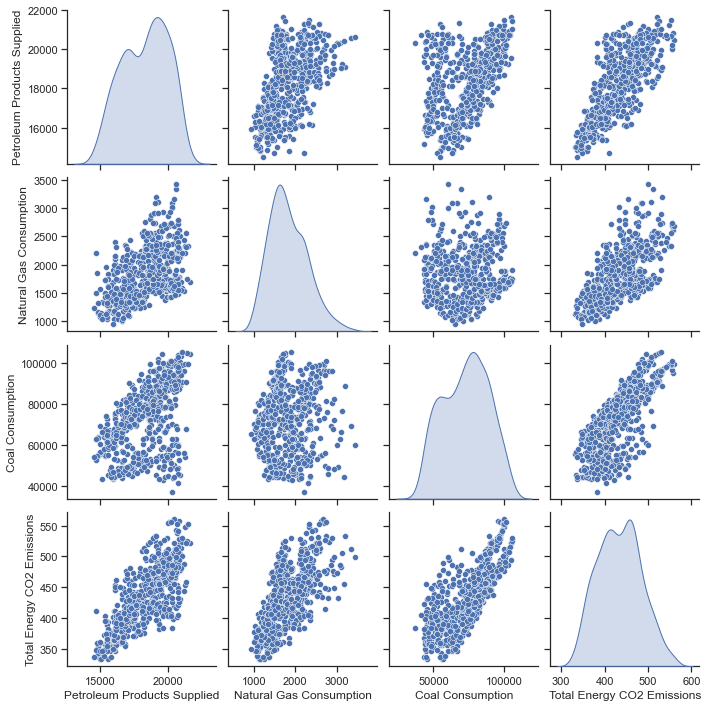

In [27]:
# Plot the scatter plot matrix
sns.set(style="ticks", color_codes=True);
sns.pairplot(data, diag_kind = 'kde')
plt.show()

## Create ML model and predict-1

In [28]:
#Split the training and test sets according to the ratio of 9:1
data_train, data_test= train_test_split(data,test_size=0.1, random_state=0)
#Independent variables
X_train=data_train.iloc[:,0:-1]
X_test=data_test.iloc[:,0:-1]
#Dependent variable:Total Energy CO2 Emissions
y_train=data_train.iloc[:,-1]
y_test=data_test.iloc[:,-1]

In [29]:
#Select model parameters
from sklearn.model_selection import RandomizedSearchCV
criterion=['mse','mae']
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'criterion':criterion,
                'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#Create a Random Forest Regressor
clf= RandomForestRegressor()
clf_random = RandomizedSearchCV(estimator=clf, param_distributions=random_grid,
                                n_iter = 10,cv = 3, verbose=2, random_state=42, n_jobs=1)
#Conduct regression and get optimal parameters
clf_random.fit(X_train, y_train)
print (clf_random.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=False, criterion=mae, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, criterion=mae, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, criterion=mae, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, criterion=mae, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=466; total time=   3.7s
[CV] END bootstrap=False, criterion=mae, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=466; total time=   3.5s
[CV] END bootstrap=False, criterion=mae, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=466; total time=   3.4s
[CV] END bootstrap=True,

Model Evaluation - Training Set：
Training-R^2: 0.9840419285776394
Model Evaluation - Test Set：
Test-R^2: 0.9716983124748718


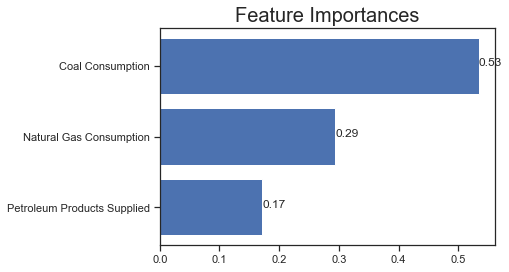

In [30]:
#Model training, validation and evaluation
rf=RandomForestRegressor(criterion='mae',bootstrap=True,max_features='auto', 
                         max_depth=70,min_samples_split=2, n_estimators=377,min_samples_leaf=2)

# Fit the data to the model
rf.fit(X_train, y_train) 
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)

print ("Model Evaluation - Training Set：")
print ('Training-R^2:',rf.score(X_train,y_train))

print ("Model Evaluation - Test Set：")
print ('Test-R^2:',rf.score(X_test,y_test))

#Get Feature Importance
ynames = ['Petroleum Products Supplied','Natural Gas Consumption','Coal Consumption']
plt.barh(range(len(rf.feature_importances_)), rf.feature_importances_,tick_label = ynames)
plt.title('Feature Importances', fontsize=20)
for index, value in enumerate(rf.feature_importances_):
    plt.text(value, index,
             str("{:.2f}".format(value)))

The random forest regression yields that **coal consumption** has the greatest impact on CO2 emissions.   
The **coefficients of determination(R^2)** of our prediction model on the training and test sets are 0.984 and 0.971, respectively, which fit well.

In [31]:
#Make a prediction
data_x_real=pd.read_csv('../../data/data_x_real.csv',index_col=0)
y_pred=rf.predict(data_x_real.values)

data_y_real=pd.read_csv('../../data/data_y_real.csv',index_col=0)
y_real=data_y_real['Total Energy CO2 Emissions'].to_numpy()

index=data_x_real.index
result=pd.DataFrame(index)
result['CO2 Emissions Real']=pd.DataFrame(y_real)
result['CO2 Emissions Pre']=y_pred
result

,Month,CO2 Emissions Real,CO2 Emissions Pre
0,2020 January,448.679,430.697659
1,2020 February,416.939,426.665595
2,2020 March,386.462,422.911007
3,2020 April,304.048,406.397158
4,2020 May,317.044,393.828574
5,2020 June,347.820,406.372829
6,2020 July,404.922,436.295775
7,2020 August,405.697,444.230509
8,2020 September,364.749,407.373501
9,2020 October,371.219,415.253618


Text(0, 0.5, 'Energy CO2 Emissions')

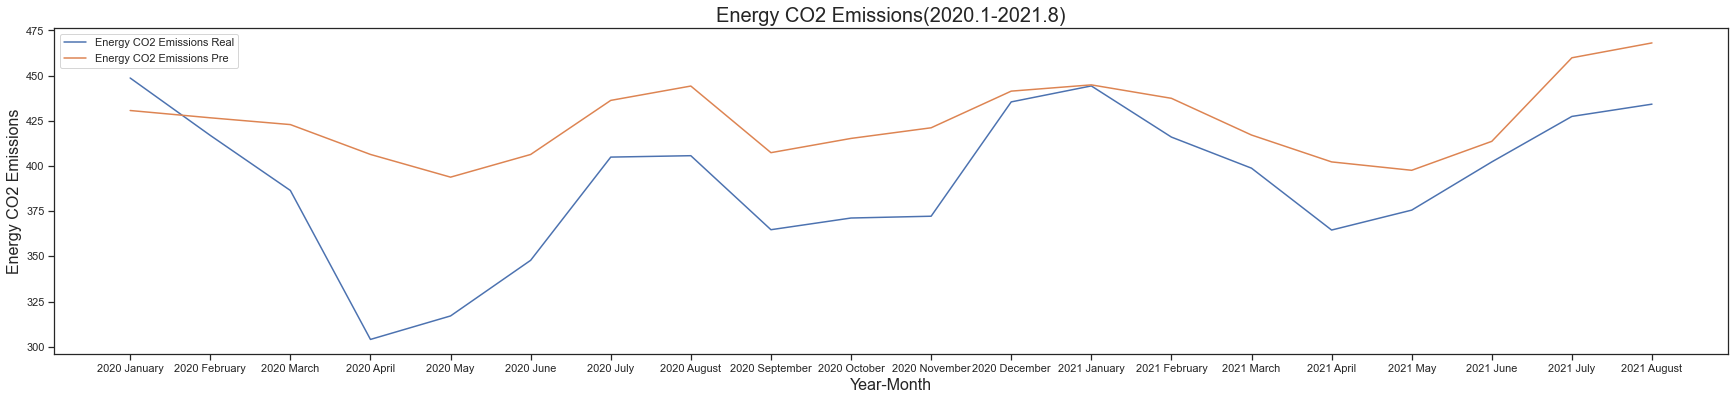

In [32]:
#Draw the real and predicted values of CO2 emissions for each month from 2020 to 2021
plt.figure(figsize=(30,6))
plt.plot(result['Month'],result['CO2 Emissions Real'],label='Energy CO2 Emissions Real')
plt.plot(result['Month'],result['CO2 Emissions Pre'],label='Energy CO2 Emissions Pre')
plt.legend()
plt.title('Energy CO2 Emissions(2020.1-2021.8)', fontsize=20)
plt.xlabel("Year-Month",fontsize=16)
plt.ylabel('Energy CO2 Emissions',fontsize=16)

### Ascept-2 : Energy Consumption by different sectors

In [33]:
data_2.head()

,Residential,Industrial,Transportation,Electric,Total Energy CO2 Emissions
Month,,,,,
1973 January,1339.270,2027.033,1504.805,1691.096,454.078
1973 February,1174.899,1841.299,1438.298,1511.458,415.098
1973 March,983.374,1926.411,1561.293,1559.159,407.423
1973 April,715.391,1914.017,1480.403,1470.152,368.205
1973 May,535.914,2076.468,1622.115,1551.631,376.028


In [34]:
#Understand the basic ground information of data
def all_about_my_data(data):
    
    # Shape of the dataframe
    print("Number of Instances:",data.shape[0])
    print("Number of Features:",data.shape[1])
    
    # Summary Stats
    print("\nSummary Stats:")
    print(data.describe())
    
    # Feature Names
    print("\nFeature Names:")
    print(data.columns)
    
    # Missing Values
    print("\nMissing Values:")
    print(data.isna().sum())

all_about_my_data(data_2)

Number of Instances: 564
Number of Features: 5

Summary Stats:
       Residential   Industrial  Transportation     Electric  \
count   564.000000   564.000000      564.000000   564.000000   
mean    586.820020  1801.295213     1987.789018  2683.600381   
std     321.408693   147.424978      298.643658   611.075316   
min     192.330000  1466.368000     1338.913000  1470.152000   
25%     303.245750  1707.754500     1713.329750  2137.053750   
50%     484.742500  1799.748000     2000.123000  2774.407500   
75%     875.467750  1891.118250     2259.483250  3127.032000   
max    1488.040000  2267.315000     2554.539000  4084.460000   

       Total Energy CO2 Emissions  
count                   564.00000  
mean                    434.17455  
std                      49.54187  
min                     332.92400  
25%                     395.90875  
50%                     433.56950  
75%                     468.61525  
max                     560.76900  

Feature Names:
Index(['Residential'

<AxesSubplot:>

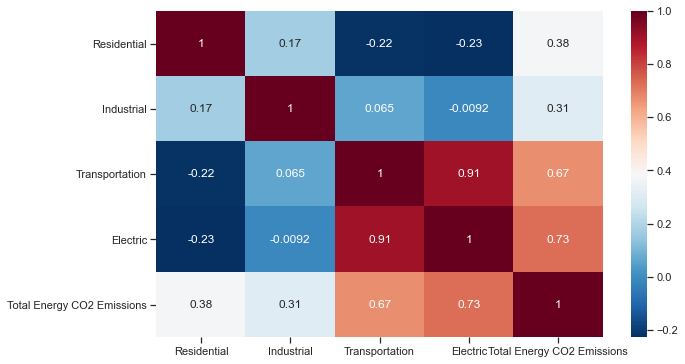

In [35]:
#Calculate correlation coefficients and plot a heat map
cor = data_2.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor, xticklabels = cor.columns, yticklabels = cor.columns,cmap = 'RdBu_r',annot=True)

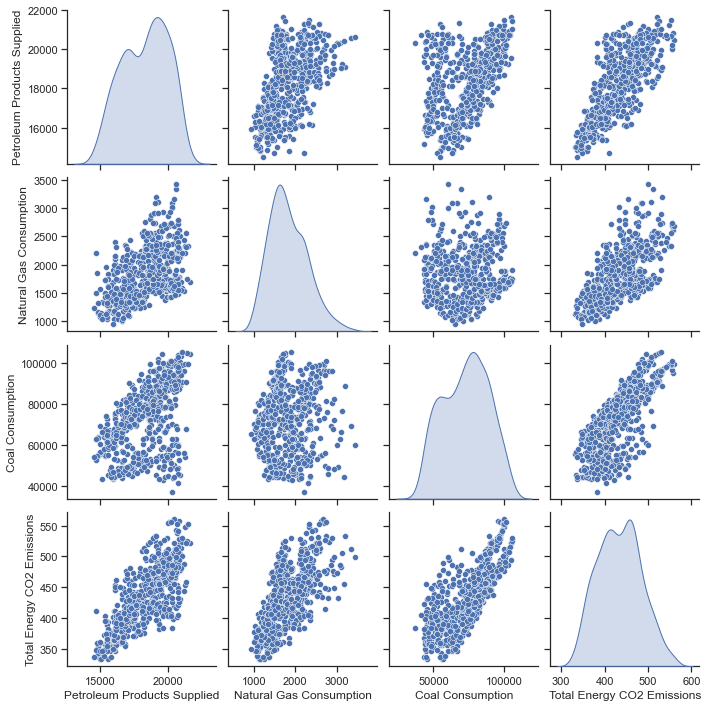

In [36]:
# Plot the scatter plot matrix
sns.set(style="ticks", color_codes=True);
sns.pairplot(data, diag_kind = 'kde')
plt.show()

## Create ML model and predict-2

In [37]:
#Split the training and test sets according to the ratio of 9:1
data_train, data_test= train_test_split(data_2,test_size=0.1, random_state=0)
#Independent variables
X_train=data_train.iloc[:,0:-1]
X_test=data_test.iloc[:,0:-1]
#Dependent variable:Total Energy CO2 Emissions
y_train=data_train.iloc[:,-1]
y_test=data_test.iloc[:,-1]

In [38]:
#Select model parameters
from sklearn.model_selection import RandomizedSearchCV
criterion=['mse','mae']
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'criterion':criterion,
                'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#Create a Random Forest Regressor
clf= RandomForestRegressor()
clf_random = RandomizedSearchCV(estimator=clf, param_distributions=random_grid,
                                n_iter = 10,cv = 3, verbose=2, random_state=42, n_jobs=1)
#Conduct regression and get optimal parameters
clf_random.fit(X_train, y_train)
print (clf_random.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=False, criterion=mae, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.6s
[CV] END bootstrap=False, criterion=mae, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.7s
[CV] END bootstrap=False, criterion=mae, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.7s
[CV] END bootstrap=False, criterion=mae, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=466; total time=   4.4s
[CV] END bootstrap=False, criterion=mae, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=466; total time=   4.3s
[CV] END bootstrap=False, criterion=mae, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=466; total time=   4.5s
[CV] END bootstrap=True,

Model Evaluation - Training Set：
Training-R^2: 0.9664491784079793
Model Evaluation - Test Set：
Test-R^2: 0.9021275923205329


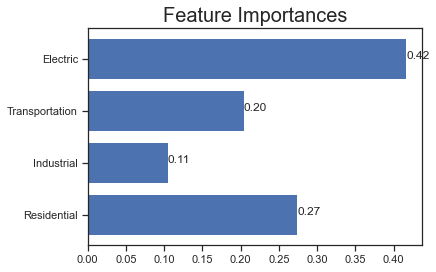

In [39]:
#Model training, validation and evaluation
rf=RandomForestRegressor(criterion='mae',bootstrap=True,max_features='auto', 
                         max_depth=70,min_samples_split=2, n_estimators=377,min_samples_leaf=2)

# Fit the data to the model
rf.fit(X_train, y_train) 
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)

print ("Model Evaluation - Training Set：")
print ('Training-R^2:',rf.score(X_train,y_train))

print ("Model Evaluation - Test Set：")
print ('Test-R^2:',rf.score(X_test,y_test))

#Get Feature Importance
ynames = ['Residential','Industrial','Transportation','Electric']
plt.barh(range(len(rf.feature_importances_)), rf.feature_importances_,tick_label = ynames)
plt.title('Feature Importances', fontsize=20)
for index, value in enumerate(rf.feature_importances_):
    plt.text(value, index,
             str("{:.2f}".format(value)))

The random forest regression yields that **Electric consumption** has the greatest impact on carbon emissions.   
The **coefficients of determination(R^2)** of our prediction model on the training and test sets are 0.967 and 0.905, respectively, which fit not bad.

In [40]:
#Make a prediction
data_x_real=pd.read_csv('../../data/data_x_real_2.csv',index_col=0)
y_pred=rf.predict(data_x_real.values)

data_y_real=pd.read_csv('../../data/data_y_real.csv',index_col=0)
y_real=data_y_real['Total Energy CO2 Emissions'].to_numpy()

index=data_x_real.index
result=pd.DataFrame(index)
result['CO2 Emissions Real']=pd.DataFrame(y_real)
result['CO2 Emissions Pre']=y_pred
result

,Month,CO2 Emissions Real,CO2 Emissions Pre
0,2020 January,448.679,503.980284
1,2020 February,416.939,471.237782
2,2020 March,386.462,456.150605
3,2020 April,304.048,362.728171
4,2020 May,317.044,399.452034
5,2020 June,347.820,431.554332
6,2020 July,404.922,472.393456
7,2020 August,405.697,455.260908
8,2020 September,364.749,437.464455
9,2020 October,371.219,430.648365


Text(0, 0.5, 'Energy CO2 Emissions')

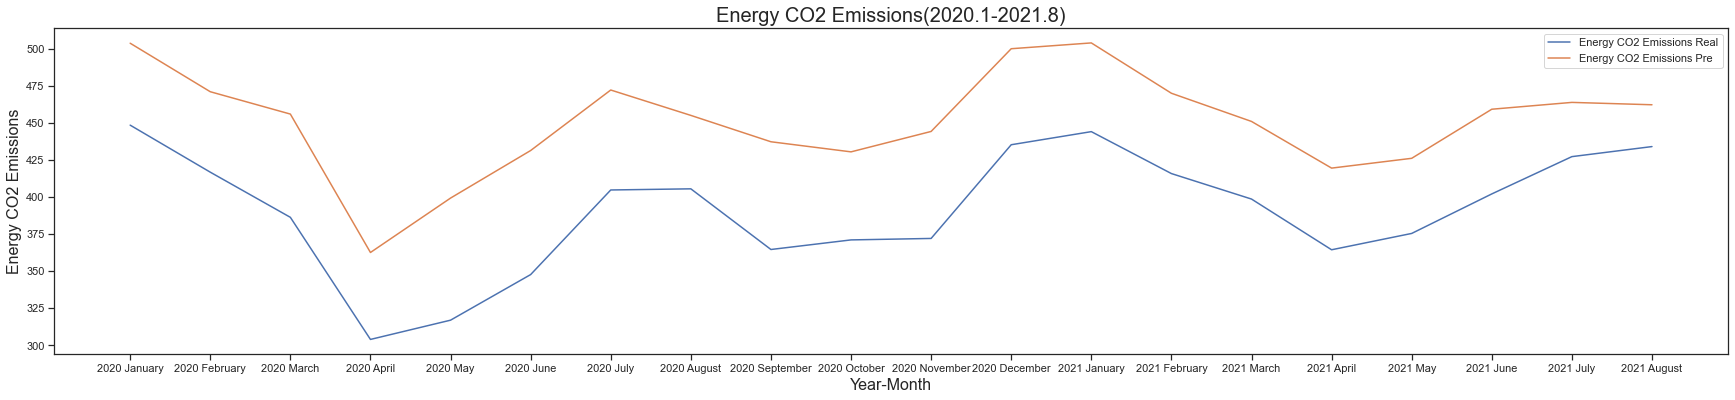

In [41]:
#Draw the real and predicted values of CO2 emissions for each month from 2020 to 2021
plt.figure(figsize=(30,6))
plt.plot(result['Month'],result['CO2 Emissions Real'],label='Energy CO2 Emissions Real')
plt.plot(result['Month'],result['CO2 Emissions Pre'],label='Energy CO2 Emissions Pre')
plt.legend()
plt.title('Energy CO2 Emissions(2020.1-2021.8)', fontsize=20)
plt.xlabel("Year-Month",fontsize=16)
plt.ylabel('Energy CO2 Emissions',fontsize=16)

## Conclusion

Energy Consumption by different energy sources(3 different sources of fossil energy) provides more accurate prediction of CO2 emissions compared with the one predicted by different sectors.The reason maybe:
- U.S.is gradually sklackening the anti-pandemic policy, thus the impact resulted from lockdown policy is also graually diminishing.
- It's just the second year we live with covid-19, long-term data will be needed to acquire more accurate prediction.

<center>
<img src =../../images/picSHE.jpg width = 400 /><br/>
    <p>Any question?</p>
</center>